## Problema del viajante

Resolver el problema del viajante utilizando algoritmos genéticos. 

- ¿Es posible aproximarse al resultado?

## Codificación

- Definir como se codificará el problema

- San Rafael X1
- El Nihuil X2
- El sosneado X3
- Villa Atuel X4
- Jaime Prats X5
- Las Malvinas X6
- Salto de las Rosas X7
- Rama caída X8
- Monte Coman X9
- Gral. Alvear X10
- Rincón del Atuel X11

Ciudades = 11
N = 10

In [270]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import itertools
from copy import deepcopy

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penaliza

In [271]:
kms = [
    [0, 72.7, 137, 59.1, 70.1, 36.6, 18.9, 8.7, 50.7, 84.8, 37.6],
    [72.7, 0, 107.8, 108, 120, 135, 97.4, 84, 69.7, 122, 35],
    [137, 108, 0, 184, 200, 162, 148, 134, 186, 214, 99.1],
    [54.3, 120, 184, 0, 16.7, 45.2, 35.6, 54.5, 47.1, 31.4, 84.7], 
    [70.1, 136, 200, 16.9, 0, 60.8, 51.3, 70.2, 41.2, 15, 64.6], 
    [36, 97.7, 162, 45.6, 60.8, 0, 18.8, 29.7, 57.8, 75.4, 62.6], 
    [18.7, 84.2, 148, 36, 51.2, 18.8, 0, 18.9, 43, 65.8, 49.1], 
    [8.7, 69.8, 134, 54.9, 73.5, 29.6, 18.8, 0, 56.4, 84.7, 34.7], 
    [50.5, 122, 186, 47.2, 41.3, 52.8, 43, 56.3, 0, 48, 86.5], 
    [84.8, 122, 214, 31.4, 15, 75.4, 65.8, 84.7, 48, 0, 115], 
    [37.6, 35.2, 99.1, 85.1, 100, 62.5, 49.1, 34.7, 86.6, 115, 0]
]

cities = [
    "San Rafael",
    "El Nihuil",
    "El sosneado",
    "Villa Atuel",
    "Jaime Prats",
    "Las Malvinas",
    "Salto de las Rosas",
    "Rama caída",
    "Monte Coman",
    "General Alvear",
    "Rincón del Atuel"
]

new_cities = [
    "El Nihuil",
    "El sosneado",
    "Villa Atuel",
    "Jaime Prats",
    "Las Malvinas",
    "Salto de las Rosas",
    "Rama caída",
    "Monte Coman",
    "General Alvear",
    "Rincón del Atuel"
]

In [272]:
def adaptation_function(population):
    fitness = []
    for pop in population:
        summ = 0
        summ += kms[0][cities.index(pop[0])] # Agregamos San Rafael a la primer ciudad
        for v, w in zip(pop[:-1],pop[1:]):
            summ += kms[cities.index(v)][cities.index(w)]
        summ += kms[0][cities.index(pop[-1])] # Agregamos la ultima ciudad a San Rafael
        fitness.append(-summ)
    return fitness

In [273]:
def create_new_population(size_pop):
    population = []
    citiess = deepcopy(new_cities)
    for i in range(size_pop):
        population.append(list(np.random.choice(citiess,replace=False,size=10)))
    return population

## Selección por torneo

In [274]:
def tournament_function(fitness_copy, fitness_aux, parents):
    while len(fitness_aux) > 0: 
        selection1,selection2 = np.random.choice(fitness_aux,size = 2, replace = False) 
        if selection1 > selection2:
            parents.append(population[fitness_copy.index(selection1)])
            fitness_aux.remove(selection1)
            fitness_aux.remove(selection2)

        elif selection1 < selection2:
            parents.append(population[fitness_copy.index(selection2)])
            fitness_aux.remove(selection1)
            fitness_aux.remove(selection2)
        else:
            random_selection = random.choice([selection1, selection2]) 
            parents.append(population[fitness_copy.index(random_selection)])
            fitness_aux.remove(selection1)
            fitness_aux.remove(selection2)
    return parents

def tournament(fitness, population):
    parents = []
    fitness_copy = deepcopy(fitness)
    fitness_aux = deepcopy(fitness)
    tournament_function(fitness_copy, fitness_aux, parents)
    return parents

## Cruza

In [275]:
def crosses_condition(parents_one, parents_two,child_one,child_two, add_parents, num):
    if add_parents:
        child_one.append(parents_two[num])
        child_two.append(parents_one[num])
        add_parents = False
    else:
        child_one.append(parents_one[num])
        child_two.append(parents_two[num])
        add_parents = True
    return child_one, child_two, add_parents

def childs_list(child_one, child_two, childs):
    childs.append(list(itertools.chain.from_iterable(child_one)))
    childs.append(list(itertools.chain.from_iterable(child_two)))
    return childs

def crosses(parents):
    childs = []
    merge = list(zip(parents,parents[1:]))[::2]
    split = np.random.choice(10 - 1, random.randint(1, 9) - 1, replace=False) + 1
    split.sort()
    for parents1, parents2 in merge:
        child_one = [] 
        child_two = []
        parents_one, parents_two = np.split(parents1, split), np.split(parents2, split)
        parents_one_size = len(parents_one)
        add_parents = False
        for num in range(parents_one_size):
            child_one, child_two, add_parents = crosses_condition(parents_one, parents_two,child_one,child_two, add_parents, num)
        childs_list(child_one, child_two, childs)
    return childs
    

## Mutacion

In [276]:
def num_random(end):
    valor = random.randint(1,end)
    return valor

def intercambio(valor1, valor2, lista):
    dato1 = lista[valor1]
    dato2 = lista[valor2]
    lista[valor1] = dato2
    lista[valor2] = dato1
    return lista


def mutation(parent): #mutacion dos genes
    j = 0
    for i in parent:
        lista = parent[j]
        aux1=num_random(len(lista)-1)
        aux2=num_random(len(lista)-1)
        while aux1 == aux2:
            aux1=num_random(len(lista)-1)
            aux2=num_random(len(lista)-1)
        lista = intercambio(aux1,aux2,lista)
        parent[j] = lista
        j = j+1

    return parent

## ALGORITMO

In [277]:
if __name__ == "__main__":
    population = create_new_population(60)
    generation = []
    best_adaptation = []
    for i in range(100):
        fitness = adaptation_function(population)
        best_adaptation.append(max(fitness)) #grafico
        generation.append(i) #grafico
        selection = tournament(fitness, population) #seleccion por torneo
        childrens = crosses(selection)  
        childrens = mutation(childrens)
        selection.extend(childrens)
        population = selection

GRAFICO

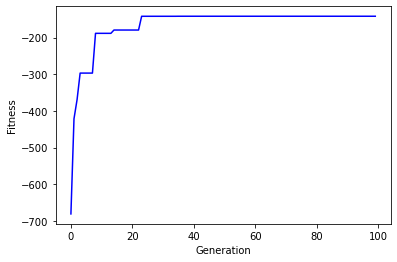

In [278]:
fig, ax = plt.subplots()
ax.plot(generation, best_adaptation, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()

# ¿Es posible aproximarse al resultado?
#### No es posible, ya que al acercarse al resultado no existe variabilidad en la población que se va generando obteniendo valores de adaptabilidad iguales en las primeras iteraciones.